In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

df = pd.read_csv('MAIN/Final_Dataframe.csv')
df.set_index('Date / Time', inplace=True)
df.index = pd.to_datetime(df.index)

In [4]:
df.head()

,Peak Real Power Demand,Reactive Energy Net,Real Energy Net,Efficiency,Date,Max Temp,Min Temp,Average Temp,Average Energy Stock,Average Rockwell Stock,High - $ per KwH,Low - $ per KwH,Average - $ per KwH
Date / Time,,,,,,,,,,,,,
2015-01-02 00:00:00,586.781692,4.339501e+07,6.731616e+07,0.608034,2015-01-02,32,17,24.5,69.214485,111.265,0.000035,0.000033,3.420333e-08
2015-01-02 01:00:00,586.328062,4.339523e+07,6.731661e+07,0.608034,2015-01-02,32,17,24.5,69.214485,111.265,0.000035,0.000033,3.420333e-08
2015-01-02 02:00:00,584.835233,4.339573e+07,6.731731e+07,0.608034,2015-01-02,32,17,24.5,69.214485,111.265,0.000035,0.000033,3.420333e-08
2015-01-02 03:00:00,599.841264,4.339607e+07,6.731788e+07,0.608034,2015-01-02,32,17,24.5,69.214485,111.265,0.000035,0.000033,3.420333e-08
2015-01-02 04:00:00,723.628769,4.339637e+07,6.731875e+07,0.608036,2015-01-02,32,17,24.5,69.214485,111.265,0.000035,0.000033,3.420333e-08


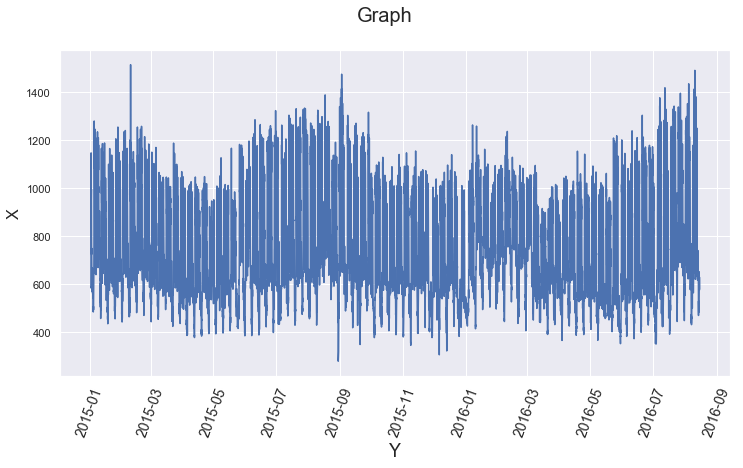

In [21]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Graph', fontsize=20)
sns.set(style="darkgrid")
sns.lineplot(x=df.index, y=df['Peak Real Power Demand'])
plt.ylabel('X', fontsize=16)
plt.xlabel('Y', fontsize=18)
plt.xticks(rotation=70, fontsize=14)
plt.show()

In [22]:
df.describe()

,Peak Real Power Demand,Reactive Energy Net,Real Energy Net,Efficiency,Max Temp,Min Temp,Average Temp,Average Energy Stock,Average Rockwell Stock,High - $ per KwH,Low - $ per KwH,Average - $ per KwH
count,14079.000000,1.407900e+04,1.407900e+04,14079.000000,14079.000000,14079.000000,14079.000000,14079.000000,14079.000000,14079.000000,14079.000000,1.407900e+04
mean,769.464375,4.623251e+07,7.121156e+07,0.604639,57.221465,41.367924,49.294694,61.616688,111.492194,0.000033,0.000032,3.251726e-08
std,223.064144,4.171443e+06,8.095142e+06,0.029588,21.371047,19.280067,20.071226,7.145442,8.202774,0.000010,0.000009,9.136502e-09
min,279.064822,1.685569e+07,2.074351e+07,0.413653,3.000000,-9.000000,-2.000000,44.226785,89.137500,0.000018,0.000017,1.776000e-08
25%,583.479516,4.488820e+07,6.958633e+07,0.606094,40.000000,29.000000,35.000000,56.735463,105.615000,0.000027,0.000026,2.643750e-08
50%,745.054133,4.669573e+07,7.239035e+07,0.606365,58.000000,42.000000,50.000000,61.345789,112.825000,0.000032,0.000031,3.133667e-08
75%,945.193000,4.846622e+07,7.484539e+07,0.607827,76.000000,58.000000,66.500000,67.739315,116.950000,0.000037,0.000036,3.648143e-08
max,1515.837627,5.050951e+07,7.762950e+07,0.751207,94.000000,74.000000,83.500000,75.529231,126.535000,0.000097,0.000089,9.357333e-08


In [49]:
temp = df.groupby(pd.Grouper(freq="d"))
week = temp['Peak Real Power Demand'].max()
week = week.to_frame()

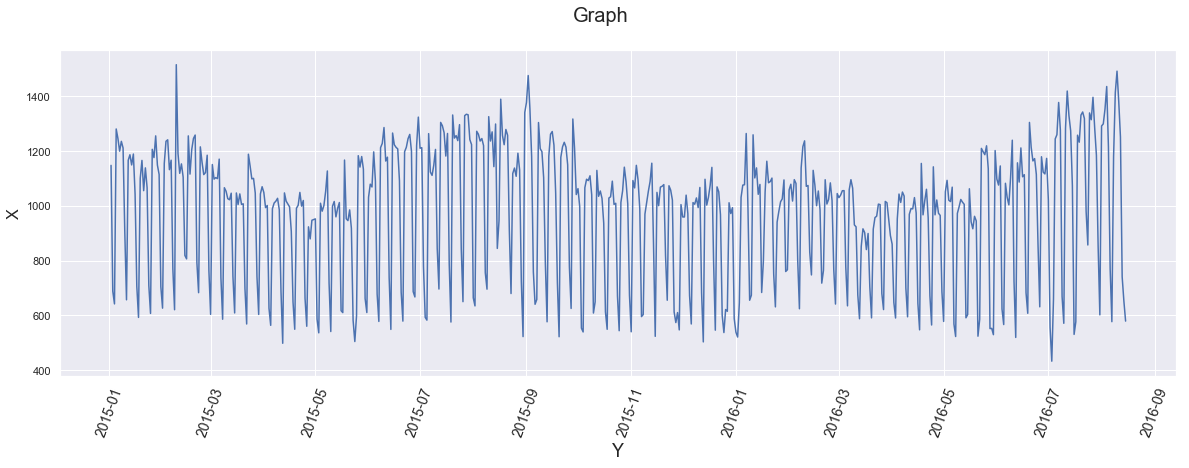

In [50]:
fig = plt.figure(figsize=(20,6))
fig.suptitle('Graph', fontsize=20)
sns.set(style="darkgrid")
sns.lineplot(x=week.index, y=week['Peak Real Power Demand'])
plt.ylabel('X', fontsize=16)
plt.xlabel('Y', fontsize=18)
plt.xticks(rotation=70, fontsize=14)
plt.show()

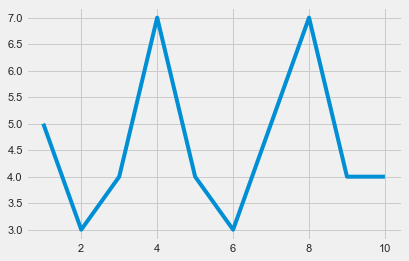

In [55]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

style.use('fivethirtyeight')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)


def animate(i):
    graph_data = open('example.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x, y = line.split(',')
            xs.append(float(x))
            ys.append(float(y))
    ax1.clear()
    ax1.plot(xs, ys)
    
    
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

In [58]:
df['Peak Real Power Demand'].head(1000)

Date / Time
2015-01-02 00:00:00     586.781692
2015-01-02 01:00:00     586.328062
2015-01-02 02:00:00     584.835233
2015-01-02 03:00:00     599.841264
2015-01-02 04:00:00     723.628769
2015-01-02 05:00:00     922.053540
2015-01-02 06:00:00    1062.028739
2015-01-02 07:00:00    1114.628803
2015-01-02 08:00:00    1147.840771
2015-01-02 09:00:00    1064.556773
2015-01-02 10:00:00    1006.442224
2015-01-02 11:00:00     944.785891
2015-01-02 12:00:00     974.429888
2015-01-02 13:00:00     976.557528
2015-01-02 14:00:00     985.360840
2015-01-02 15:00:00     996.776313
2015-01-02 16:00:00     905.077308
2015-01-02 17:00:00     939.377312
2015-01-02 18:00:00     866.025948
2015-01-02 19:00:00     751.004726
2015-01-02 20:00:00     725.093217
2015-01-02 21:00:00     750.030686
2015-01-02 22:00:00     731.445330
2015-01-02 23:00:00     697.618086
2015-01-03 00:00:00     688.222462
2015-01-03 01:00:00     667.221521
2015-01-03 02:00:00     641.993252
2015-01-03 03:00:00     574.691183
2015-01-

In [59]:
df.head()

,Peak Real Power Demand,Reactive Energy Net,Real Energy Net,Efficiency,Date,Max Temp,Min Temp,Average Temp,Average Energy Stock,Average Rockwell Stock,High - $ per KwH,Low - $ per KwH,Average - $ per KwH
Date / Time,,,,,,,,,,,,,
2015-01-02 00:00:00,586.781692,4.339501e+07,6.731616e+07,0.608034,2015-01-02,32,17,24.5,69.214485,111.265,0.000035,0.000033,3.420333e-08
2015-01-02 01:00:00,586.328062,4.339523e+07,6.731661e+07,0.608034,2015-01-02,32,17,24.5,69.214485,111.265,0.000035,0.000033,3.420333e-08
2015-01-02 02:00:00,584.835233,4.339573e+07,6.731731e+07,0.608034,2015-01-02,32,17,24.5,69.214485,111.265,0.000035,0.000033,3.420333e-08
2015-01-02 03:00:00,599.841264,4.339607e+07,6.731788e+07,0.608034,2015-01-02,32,17,24.5,69.214485,111.265,0.000035,0.000033,3.420333e-08
2015-01-02 04:00:00,723.628769,4.339637e+07,6.731875e+07,0.608036,2015-01-02,32,17,24.5,69.214485,111.265,0.000035,0.000033,3.420333e-08


In [62]:
power = df['Peak Real Power Demand'].values

In [63]:
power

array([586.7816918 , 586.32806234, 584.83523257, ..., 609.5928649 ,
       629.4339362 , 578.7251603 ])

In [88]:
y = ((power*.13)**1.2).tolist()